In [246]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.time import Time
import astropy.units as u

plt.rcParams['mathtext.fontset'], plt.rcParams['font.family'] = 'stix', 'STIXGeneral'
plt.rcParams.update({'font.size': 16})

In [247]:
# alt, az pointing ranges of Leuschner
alt_min, alt_max = 15, 85
az_min, az_max = 5, 350

In [248]:
# ra and dec of SGR1935 taken from McGill Online Magnetar Catalog
# https://www.physics.mcgill.ca/~pulsar/magnetar/main.html
sgr = SkyCoord('19h34m55.598s', '+21d53m47.79s', frame='icrs')

# Coords for Leuschner
lat, lon, alt = 37.9183, -122.1067, 304.0
leuschner = EarthLocation(lat=lat, lon=lon, height=alt)
PST = -7*u.hour
time = Time('2022-7-27 12:00:00') + PST

In [249]:
sgr_altaz = sgr.transform_to(AltAz(obstime=time, location=leuschner))

In [250]:
midnight = Time('2022-7-27 00:00:00') + PST # Change date for today's visability
hours = np.linspace(0, 24, 100)*u.hour
sgr_altaz = sgr.transform_to(AltAz(obstime=midnight+hours, location=leuschner))

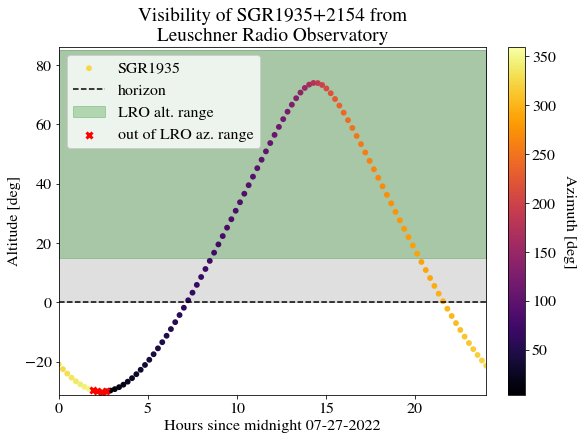

In [252]:
plt.figure(figsize=(8,6), constrained_layout=True)
plt.title('Visibility of SGR1935+2154 from\nLeuschner Radio Observatory')

plt.scatter(hours, sgr_altaz.alt,
            c=sgr_altaz.az, label='SGR1935', lw=3, s=8,
            cmap='inferno')
plt.colorbar().set_label('Azimuth [deg]', labelpad=20, rotation=270)
plt.hlines(0, min(hours.value), max(hours.value), 'k', linestyles='dashed', label='horizon')
plt.fill_between(hours.value, alt_max, zorder=0, alpha=0.25, color='grey')
plt.fill_between(hours.value, alt_min, alt_max, zorder=0, alpha=0.25, color='green', label='LRO alt. range')
plt.scatter(hours[np.where(sgr_altaz.az.value<az_min)], 
            sgr_altaz.alt[np.where(sgr_altaz.az.value<az_min)], color='red', marker='x', lw=3)
plt.scatter(hours[np.where(sgr_altaz.az.value>az_max)], 
            sgr_altaz.alt[np.where(sgr_altaz.az.value>az_max)], color='red', marker='x', lw=3, label='out of LRO az. range')

plt.xlabel('Hours since midnight 07-27-2022')
plt.ylabel('Altitude [deg]')
plt.margins(x=0, y=0.01)
plt.legend()
plt.show()